#Sentiment Analysis -Apple Tweets 
Problem Statement

We will be trying to understand sentiment of tweets about the company Apple. By using the twitter data we can hope to understand the public perception a bit better.

Our challenge is to see if we can correctly classify tweets as being either positive or negative.

Problem Statement: • Correctly classify the tweets as being positive or negative.

## Importing the necessary libraries along with the standard import

In [ ]:
import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

## Let us check the version of the various libraries

In [ ]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.19.5
Pandas version: 1.1.5
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.2.5
Matplotlib version: 3.2.2


##Load the csv file available in the working or specified directory

In [ ]:
tweets = pd.read_csv("/content/drive/MyDrive/Smita/Google Drive/Great Learning/Greatlearning_PGPDSBA (Rivision)/Machine Learning /Text analytics _projects /Apple_tweets (2).csv")

In [ ]:
tweets.head()

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8


In [ ]:
tweets['Tweet']=tweets['Tweet'].str.replace('[^\w\s]','')
# \w: Returns a match where string contains any words characters(characters from a to Z,digitss from 0-9 and underscore_character)
# \s:Return a match where the string contains white space character
# [^]:Returns a matche for any character Except what is written after it.
tweets

,Tweet,Avg
0,I have to say Apple has by far the best custom...,2.0
1,iOS 7 is so fricking smooth beautiful ThanxAp...,2.0
2,LOVE U APPLE,1.8
3,Thank you apple loving my new iPhone 5S apple...,1.8
4,apple has the best customer service In and out...,1.8
...,...,...
1176,freak apple,-2.0
1177,WHY CANT I freakING SEE PICTURES ON MY TL IM A...,-2.0
1178,APPLE YOU freakING COWS freak YOU,-2.0
1179,apple I hate you why is my phone not working I...,-2.0


## Converting all the words to lower case

In [ ]:
tweets['Tweet']=tweets['Tweet'].apply( lambda x: " ".join(x.lower() for x in x.split()))
tweets

,Tweet,Avg
0,i have to say apple has by far the best custom...,2.0
1,ios 7 is so fricking smooth beautiful thanxapp...,2.0
2,love u apple,1.8
3,thank you apple loving my new iphone 5s apple ...,1.8
4,apple has the best customer service in and out...,1.8
...,...,...
1176,freak apple,-2.0
1177,why cant i freaking see pictures on my tl im a...,-2.0
1178,apple you freaking cows freak you,-2.0
1179,apple i hate you why is my phone not working i...,-2.0


## We define a function to convert 'Avg' column into a column with two classes which will be treated as the target variables.

In [ ]:
def Tweet(x):
  if x>=0:
    return "Positive"
  else :return "Negative"
# We defined a Tweet function which takes x as input and using conditional statement for input greater than equal to 0 .And if the coditional statement is satisfied ,function will return positive else negative string .


## Applying user defined Tweet function on avg column and creating a new column with sentiments and we will drop the avg column.

In [ ]:
tweets['sentiments']=tweets['Avg'].apply(Tweet)

# Drop the avg column from the data frame.


In [ ]:
tweets.drop("Avg",axis=1,inplace=True)

In [ ]:
tweets

,Tweet,sentiments
0,i have to say apple has by far the best custom...,Positive
1,ios 7 is so fricking smooth beautiful thanxapp...,Positive
2,love u apple,Positive
3,thank you apple loving my new iphone 5s apple ...,Positive
4,apple has the best customer service in and out...,Positive
...,...,...
1176,freak apple,Negative
1177,why cant i freaking see pictures on my tl im a...,Negative
1178,apple you freaking cows freak you,Negative
1179,apple i hate you why is my phone not working i...,Negative


We see that the newly created 'Sentiment' variable has all the positive entries one after the other and all the negative entries after. Since we need to split the data into training and test randomly we have to jumble up the data set.

Note: We are not using the train-test split function from sklearn and hence the need to jumble the data .
1.use sample(frac=1,random_state=3) sample function return random sample of items and randome _state fro reproducibility,frac=1 (used to generate random sample for whole data set)
2.reset_index() is used to reset the index as it is shuffled .
3.drop the privious index

In [ ]:
tweets=tweets.sample(frac=1,random_state=3).reset_index().drop("index",axis=1)

In [ ]:
tweets.head()

,Tweet,sentiments
0,securitycompass apple,Positive
1,quelquun peutil expliquer a apple ce quest le ...,Negative
2,disappointing rt joconfino nothing short of a ...,Negative
3,electrafood twitter apple me to ugh,Positive
4,we have something that you wish you had called...,Positive


# First we are splitting each rows into words using split(), and joining the words using spaces between them  and making a series of it and  extracting one by one words and storing all this words in variable named all_words.

In [ ]:

all_Words=[x for x in pd.Series(' '.join(tweets['Tweet']).split())] 

In [ ]:
nltk.FreqDist(all_Words).most_common(10)

[('apple', 1297),
 ('the', 489),
 ('to', 326),
 ('iphone', 257),
 ('i', 251),
 ('a', 238),
 ('is', 209),
 ('you', 187),
 ('and', 183),
 ('for', 145)]

In [ ]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower casse
all_words = (x.lower() for x in all_Words)# we can skip this line since we have already converted all the words to lowercase
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features = [item[0] for item in all_words_freq.most_common(2000)]

In [ ]:
word_features

In [ ]:
## We are defining a function to appropriately process the text document

def document_features(document): # we are naming the function as document_features
    document_words = set(document) #getting the unique number of entries in the document variable
    features = {} #defining an empty dictionary
    for word in word_features: #looping over the 'word_features' which has been defined in the last code block
        features['contains({})'.format(word)] = (word in document_words) #defining 'features' in  particular format
        # and checking whether the unique elements of the input 'document' are contained in the 'word_features' 
        # defined before
    return features

In [ ]:
frame = Apple_tweets.copy() #storing Apple_tweets in another variables
frame.columns = ["feature", "label"] # defning the names of the colummn of the data frame 'frame'
frame['feature'] = frame.apply(lambda row: nltk.word_tokenize(str(row['feature'])), axis=1) #the features of the 'frame' data frame are stored in the variable 'feature'
# In the above code snippet we are tokenizing the variables
frame['label'] = frame.label # the labels of the 'frame' data frame are stored in the variable 'label'

In [ ]:
Apple_tweets

In [ ]:
frame

In [ ]:
frame['feature'][0]

In [ ]:
## We are defining our combined data frame which we will split into training and test before fitting a classifier

# We are creating a list the entries of which are a tuple. We are appending the list with tuples whose entries are the 
# pre-processed tweets and the corresponding sentiment attached to it.
featuresets = [(document_features(feature), label) for index, (feature, label) in frame.iterrows()]

In [ ]:
featuresets[0]

In [ ]:
# Train Naive Bayes classifier
train_set, test_set = featuresets[0:int(len(featuresets)*0.7)], featuresets[int(len(featuresets)*0.7):]

classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
print(nltk.classify.accuracy(classifier, test_set))

Alternate Way: using Naive Bayes Classifier.¶
Now, let us reload the data and look at a few other text mining functionalities that Python offers us and then go on to fit a classifier algorithm.

In [ ]:
tweets = pd.read_csv("/content/drive/MyDrive/Smita/Google Drive/Great Learning/Greatlearning_PGPDSBA (Rivision)/Machine Learning /Text analytics _projects /Apple_tweets (2).csv")

Basic Exploration in Text Mining
Number of words
To create a temporary function lambda can be used. These functions do not require a name like a def function, however the output is same as defining a permanent function As these function are temporary, memory comsumption is less in comparison to permanent function. Also there are multiple ways to get a similar output

In [ ]:
## Let's get a word count without writing a lambda function

Apple_tweets['totalwords'] = [len(x.split()) for x in Apple_tweets['Tweet'].tolist()]
Apple_tweets[['Tweet','totalwords']].head()

,Tweet,totalwords
0,"i have to say, apple has by far the best custo...",19
1,ios 7 is so fricking smooth & beautiful!! #tha...,10
2,love u @apple,3
3,"thank you @apple, loving my new iphone 5s!!!!!...",11
4,.@apple has the best customer service. in and ...,16


In [ ]:
Apple_tweets['word_count'] = Apple_tweets['Tweet'].apply(lambda x: len(str(x).split(" ")))
Apple_tweets[['Tweet','word_count']].head()

,Tweet,word_count
0,"i have to say, apple has by far the best custo...",19
1,ios 7 is so fricking smooth & beautiful!! #tha...,10
2,love u @apple,3
3,"thank you @apple, loving my new iphone 5s!!!!!...",11
4,.@apple has the best customer service. in and ...,16


Number of Characters- including spaces

In [ ]:
Apple_tweets['char_count'] = Apple_tweets['Tweet'].str.len()
Apple_tweets[['Tweet','char_count']].head()

,Tweet,char_count
0,"i have to say, apple has by far the best custo...",101
1,ios 7 is so fricking smooth & beautiful!! #tha...,60
2,love u @apple,13
3,"thank you @apple, loving my new iphone 5s!!!!!...",90
4,.@apple has the best customer service. in and ...,82


In [ ]:
Apple_tweets['Tweet'][0]

'i have to say, apple has by far the best customer care service i have ever received! @apple @appstore'

In [ ]:
len(Apple_tweets['Tweet'][0])

101

Average Word Length

In [ ]:
def avg_word(sentence):
    words = sentence.split() #splitting the words separately from the input taken
    return (sum(len(word) for word in words)/len(words)) # getting the average number of words in the each of the entries

Apple_tweets['avg_word'] = Apple_tweets['Tweet'].apply(lambda x: avg_word(x))
Apple_tweets[['Tweet','avg_word']].head()

,Tweet,avg_word
0,"i have to say, apple has by far the best custo...",4.368421
1,ios 7 is so fricking smooth & beautiful!! #tha...,5.100000
2,love u @apple,3.666667
3,"thank you @apple, loving my new iphone 5s!!!!!...",7.272727
4,.@apple has the best customer service. in and ...,4.187500


Number of stop Words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Number of stop Words

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

Apple_tweets['stopwords'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
Apple_tweets[['Tweet','stopwords']].head()

,Tweet,stopwords
0,"i have to say, apple has by far the best custo...",8
1,ios 7 is so fricking smooth & beautiful!! #tha...,2
2,love u @apple,0
3,"thank you @apple, loving my new iphone 5s!!!!!...",2
4,.@apple has the best customer service. in and ...,9


Number of stopwords

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

Apple_tweets['stopwords'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
Apple_tweets[['Tweet','stopwords']].head()

,Tweet,stopwords
0,"i have to say, apple has by far the best custo...",8
1,ios 7 is so fricking smooth & beautiful!! #tha...,2
2,love u @apple,0
3,"thank you @apple, loving my new iphone 5s!!!!!...",2
4,.@apple has the best customer service. in and ...,9


Number of special character

In [ ]:
Apple_tweets['hastags'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
Apple_tweets[['Tweet','hastags']].head()

,Tweet,hastags
0,"i have to say, apple has by far the best custo...",0
1,ios 7 is so fricking smooth & beautiful!! #tha...,1
2,love u @apple,0
3,"thank you @apple, loving my new iphone 5s!!!!!...",2
4,.@apple has the best customer service. in and ...,0


Number of numerics

In [ ]:
Apple_tweets['numerics'] = Apple_tweets['Tweet'].apply(lambda x: len(re.findall(r'[0-9]',x)))
Apple_tweets[['Tweet','numerics']].head()

,Tweet,numerics
0,"i have to say, apple has by far the best custo...",0
1,ios 7 is so fricking smooth & beautiful!! #tha...,1
2,love u @apple,0
3,"thank you @apple, loving my new iphone 5s!!!!!...",3
4,.@apple has the best customer service. in and ...,2


Number of Uppercase Words

In [ ]:
Apple_tweets['upper'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
Apple_tweets[['Tweet','upper']].head()

,Tweet,upper
0,"i have to say, apple has by far the best custo...",0
1,ios 7 is so fricking smooth & beautiful!! #tha...,0
2,love u @apple,0
3,"thank you @apple, loving my new iphone 5s!!!!!...",0
4,.@apple has the best customer service. in and ...,0


Number of Uppercase Letters

In [ ]:
Apple_tweets['upper_letter'] = Apple_tweets['Tweet'].apply(lambda x: len(re.findall(r'[A-Z]',x)))
Apple_tweets[['Tweet','upper_letter']].head()

,Tweet,upper_letter
0,"i have to say, apple has by far the best custo...",0
1,ios 7 is so fricking smooth & beautiful!! #tha...,0
2,love u @apple,0
3,"thank you @apple, loving my new iphone 5s!!!!!...",0
4,.@apple has the best customer service. in and ...,0


Basic Pre-Processing
Lower Case conversion

In [ ]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Apple_tweets['Tweet'].head()

0    i have to say, apple has by far the best custo...
1    ios 7 is so fricking smooth & beautiful!! #tha...
2                                        love u @apple
3    thank you @apple, loving my new iphone 5s!!!!!...
4    .@apple has the best customer service. in and ...
Name: Tweet, dtype: object

Removal of Punctuation

In [ ]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
Apple_tweets['Tweet'].head()

0    i have to say apple has by far the best custom...
1    ios 7 is so fricking smooth  beautiful thanxap...
2                                         love u apple
3    thank you apple loving my new iphone 5s apple ...
4    apple has the best customer service in and out...
Name: Tweet, dtype: object

Removal of StopWords

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Apple_tweets['Tweet'].head()

0    say apple far best customer care service ever ...
1     ios 7 fricking smooth beautiful thanxapple apple
2                                         love u apple
3    thank apple loving new iphone 5s apple iphone5...
4          apple best customer service new phone 10min
Name: Tweet, dtype: object

Common Words Removal
We will create a list of 10 frequently occuring words and then decide if we need to remove it or retain it.
Reason is that this file has tweets related to Apple.. So no point in keeping the word like Apple, unless we have tweets from other brands

In [ ]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[:10]
freq

apple              1297
iphone              257
new                 113
5s                   91
ipad                 88
itunes               79
phone                75
ipod                 71
ipodplayerpromo      60
get                  60
dtype: int64

In [ ]:
freq =['apple','get']

As we are talking about multiple products hence iphone will be kept, similarly some tweets do relate to old products without mentioning the word old, hence even new would be kept in the tweets.
hence only apple and get would be removed

In [ ]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Apple_tweets['Tweet'].head()

0    say far best customer care service ever receiv...
1           ios 7 fricking smooth beautiful thanxapple
2                                               love u
3    thank loving new iphone 5s iphone5s pictwitter...
4                best customer service new phone 10min
Name: Tweet, dtype: object

Rare Words Removal
This is done as association of these less occurring words with the existing words could be a noise

In [ ]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[-10:]
freq
## As it is difficult to make out if these words will have association in text analytics or not, 
## hence to start with these words are kept in the dataset

covering         1
lawschoolsrat    1
40mb             1
profile          1
soldier          1
adds             1
default          1
olha             1
preinstalled     1
musician         1
dtype: int64

Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
Apple_tweets['Tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0       say far best custom care servic ever receiv ap...
1                      io 7 frick smooth beauti thanxappl
2                                                  love u
3       thank love new iphon 5s iphone5 pictwittercomx...
4                      best custom servic new phone 10min
                              ...                        
1176                                                freak
1177      cant freak see pictur tl im annoy freak twitter
1178                                      freak cow freak
1179                          hate phone work im go freak
1180                     agounalaki that nasti nasti brat
Name: Tweet, Length: 1181, dtype: object

In [ ]:
def Tweet(x):
    if x >= 0:
        return "Positive"
    else: return "Negative"

Now to get the sentiments as positive and negative , convert the Avg column . If value is >= 0 then tweet is Positive, else tweet is Negative. This will make a dependent variable as a binary classifier

In [ ]:
Apple_tweets["Sentiment"] = Apple_tweets["Avg"].apply(Tweet)

Apple_tweets.head()

,Tweet,Avg,totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,upper_letter,Sentiment
0,say far best customer care service ever receiv...,2.0,19,19,101,4.368421,8,0,0,0,0,Positive
1,ios 7 fricking smooth beautiful thanxapple,2.0,10,10,60,5.100000,2,1,1,0,0,Positive
2,love u,1.8,3,3,13,3.666667,0,0,0,0,0,Positive
3,thank loving new iphone 5s iphone5s pictwitter...,1.8,11,11,90,7.272727,2,2,3,0,0,Positive
4,best customer service new phone 10min,1.8,16,16,82,4.187500,9,0,2,0,0,Positive


In [ ]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweet         1181 non-null   object 
 1   Avg           1181 non-null   float64
 2   totalwords    1181 non-null   int64  
 3   word_count    1181 non-null   int64  
 4   char_count    1181 non-null   int64  
 5   avg_word      1181 non-null   float64
 6   stopwords     1181 non-null   int64  
 7   hastags       1181 non-null   int64  
 8   numerics      1181 non-null   int64  
 9   upper         1181 non-null   int64  
 10  upper_letter  1181 non-null   int64  
 11  Sentiment     1181 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 110.8+ KB


Let's look at distribution of different sentiments

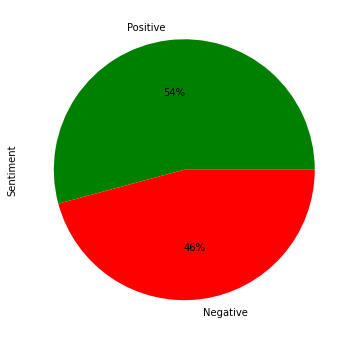

In [ ]:
plt.figure(figsize=(8,6))
Apple_tweets.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green","red"])
plt.show()

In [ ]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweet         1181 non-null   object 
 1   Avg           1181 non-null   float64
 2   totalwords    1181 non-null   int64  
 3   word_count    1181 non-null   int64  
 4   char_count    1181 non-null   int64  
 5   avg_word      1181 non-null   float64
 6   stopwords     1181 non-null   int64  
 7   hastags       1181 non-null   int64  
 8   numerics      1181 non-null   int64  
 9   upper         1181 non-null   int64  
 10  upper_letter  1181 non-null   int64  
 11  Sentiment     1181 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 110.8+ KB


In [ ]:
processed_features = Apple_tweets.iloc[:, 0].values
labels = Apple_tweets.iloc[:, 11].values

In [ ]:
processed_features

array(['say far best customer care service ever received appstore',
       'ios 7 fricking smooth beautiful thanxapple', 'love u', ...,
       'freaking cows freak', 'hate phone working im going freak',
       'agounalakis thats nasty nasty brat'], dtype=object)

In [ ]:
labels

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

TfidfVectorizer
More here - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [ ]:
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.8, max_features=2500,
                min_df=7, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
## Extra Knowledge Bytes (TF-IDF)

# Let's see how our TD-IDF looks like (sorting by the feature named 5s)
# Creating the TF-IDF with the feature names given by the TFIDF vectorizer, sorting it for unerstanding.
# Let's chain the .head() method on the DataFrame to inspect the first few observations of the TD-IDF sorted by '5s'
pd.DataFrame(processed_features, columns = vectorizer.get_feature_names()).sort_values(by = '5s', ascending=False).head()

,5c,5s,7evenstarz,actually,already,always,amazing,amazon,android,anyone,app,apples,apps,appstore,arent,available,awesome,back,battery,best,better,big,bit,black,blackberry,burberry,business,buy,cant,carbon,cards,care,cc,cdp,charge,chargers,cheap,china,color,come,...,thats,thing,things,think,tho,time,today,touchid,twitter,two,update,upgrade,us,use,using,via,video,vp,wait,want,way,well,whats,windowsphone,wish,wont,work,working,worst,would,wow,wtf,ya,yall,year,yes,yet,yo,yooo,youre
742,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
993,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0)

In [ ]:
y_train

array(['Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positi

Gaussian Naive Bayes

In [ ]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.7699757869249395
[[198 168]
 [ 22 438]]
              precision    recall  f1-score   support

    Negative       0.90      0.54      0.68       366
    Positive       0.72      0.95      0.82       460

    accuracy                           0.77       826
   macro avg       0.81      0.75      0.75       826
weighted avg       0.80      0.77      0.76       826



In [ ]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.6704225352112676
[[ 92  83]
 [ 34 146]]
              precision    recall  f1-score   support

    Negative       0.73      0.53      0.61       175
    Positive       0.64      0.81      0.71       180

    accuracy                           0.67       355
   macro avg       0.68      0.67      0.66       355
weighted avg       0.68      0.67      0.66       355



Pl. note - Model building is an iterative process. Model performance both on the test and train dataset can be improved using feature engineering, feature extraction, hyper parameter tuning (including combination of various parameters).

Model has to match the business objective and hence various permutation and combinations can be tried on to refine the model

Creating a Wordcloud

In [ ]:
# Recall Apple_Tweets['Tweet'] from above. It has been processed at a basic level!

Apple_tweets['Tweet'].iloc[30:31] #Checking a tweet at random!

30    dear love new default alarm ringtone goodmorning
Name: Tweet, dtype: object

In [ ]:
# Removing symbols and punctuations 
# further_clean = Apple_tweets['Tweet'].str.replace('[^\w\s]','')

# Extending the list of stop words (including words like Apple, bitly, dear, please, etc.)
stop_words = list(stopwords.words('english'))
stop_words.extend(["apple", "http","bit","bitly","bit ly", "dear", "im", "i'm", "please"])

In [ ]:
#Removing stop words (extended list as above) from the corpus 

corpus = Apple_tweets['Tweet'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus

0       say far best customer care service ever receiv...
1              ios 7 fricking smooth beautiful thanxapple
2                                                  love u
3       thank loving new iphone 5s iphone5s pictwitter...
4                   best customer service new phone 10min
                              ...                        
1176                                                freak
1177    cant freaking see pictures tl annoyed freak tw...
1178                                  freaking cows freak
1179                       hate phone working going freak
1180                   agounalakis thats nasty nasty brat
Name: Tweet, Length: 1181, dtype: object

In [ ]:
wc_a = ' '.join(corpus)

Word Cloud for Apple_Tweets (after cleaning)!!


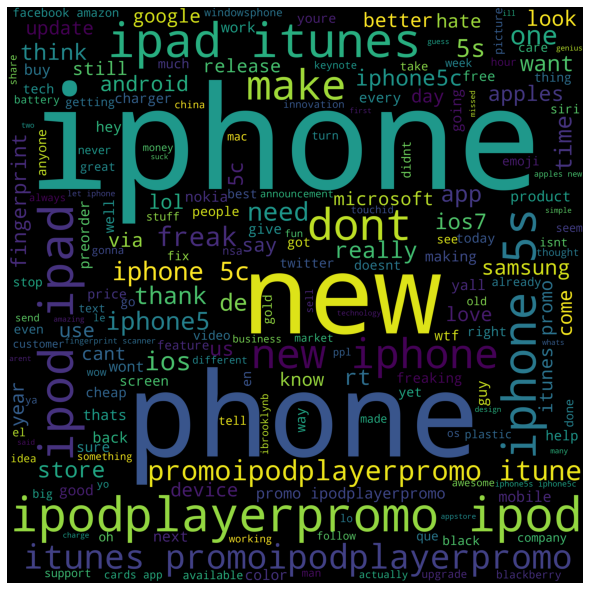

In [ ]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

END